# Problem 7: Priors, Sensitivity, Specificity
     Let’s revisit the task we disease problem we tackled during class. Imagine you are a medical researcher analyzing the effectiveness of a new diagnostic test for a rare disease X. This disease affects 1% of the population. The probability of a true positive (the test correctly identifies an individual as having the disease) is 95%. This is also known as the sensitivity of the test. The probability of a true negative (the test correctly identifies an individual as not having the disease) is 90%. This is also known as the specificity of the test.
     We will now consider a question of sensitivity analysis (not to be confused with the sensitivity of a test): How would the posterior probability change if the prior, the sensitivity, or the specificity of the test were to test. Write a Python program which produces three pretty and annotated 2D graphs depicting

1. The posterior probability (Y-axis) of actually having the disease given a
positive test as a function of the prior probability (X-axis), assuming fixed
sensitivity and specificity.
2. The posterior probability (Y-axis) of actually having the disease given a
positive test as a function of the test’s sensitivity (X-axis), assuming fixed
prior and specificity.
3
3. The posterior probability (Y-axis) of actually having the disease given a
positive test as a function of the test’s specificity (X-axis), assuming fixed
prior and sensitivity.

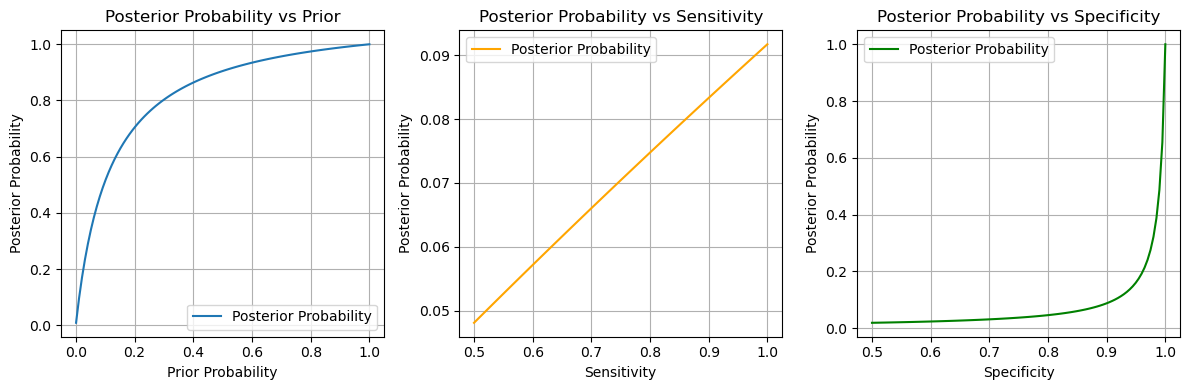

In [8]:
import numpy as np
import matplotlib.pyplot as plt

prior = 0.01  # Disease prevalence (prior probability of disease)
sensitivity = 0.95  # True positive rate
specificity = 0.90  # True negative rate

# Function to calculate posterior probability given a positive test result
def posterior_probability(prior, sensitivity, specificity):
    # Probability of testing positive given disease P(T+|D)
    prob_test_positive_given_disease = sensitivity
    # Probability of testing positive given no disease P(T+|~D)
    prob_test_positive_given_no_disease = 1 - specificity
    # Total probability of testing positive P(T+)
    prob_test_positive = (prior * prob_test_positive_given_disease) + \
                         ((1 - prior) * prob_test_positive_given_no_disease)
    # Posterior probability P(D|T+)
    post_prob = (prior * prob_test_positive_given_disease) / prob_test_positive
    return post_prob

# 1. Posterior probability as a function of prior probability
priors = np.linspace(0.001, 1, 100)  # X-axis: range of prior probabilities
posterior_priors = [posterior_probability(p, sensitivity, specificity) for p in priors]

# Plotting
plt.figure(figsize=(12, 4))

# First plot: Posterior vs Prior
plt.subplot(1, 3, 1)
plt.plot(priors, posterior_priors, label='Posterior Probability')
plt.xlabel('Prior Probability')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability vs Prior')
plt.grid(True)
plt.legend()

# 2. Posterior probability as a function of sensitivity
sensitivities = np.linspace(0.5, 1, 100)  # X-axis: range of sensitivities
posterior_sensitivities = [posterior_probability(prior, s, specificity) for s in sensitivities]

# Second plot: Posterior vs Sensitivity
plt.subplot(1, 3, 2)
plt.plot(sensitivities, posterior_sensitivities, label='Posterior Probability', color='orange')
plt.xlabel('Sensitivity')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability vs Sensitivity')
plt.grid(True)
plt.legend()

# 3. Posterior probability as a function of specificity
specificities = np.linspace(0.5, 1, 100)  # X-axis: range of specificities
posterior_specificities = [posterior_probability(prior, sensitivity, sp) for sp in specificities]

# Third plot: Posterior vs Specificity
plt.subplot(1, 3, 3)
plt.plot(specificities, posterior_specificities, label='Posterior Probability', color='green')
plt.xlabel('Specificity')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability vs Specificity')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


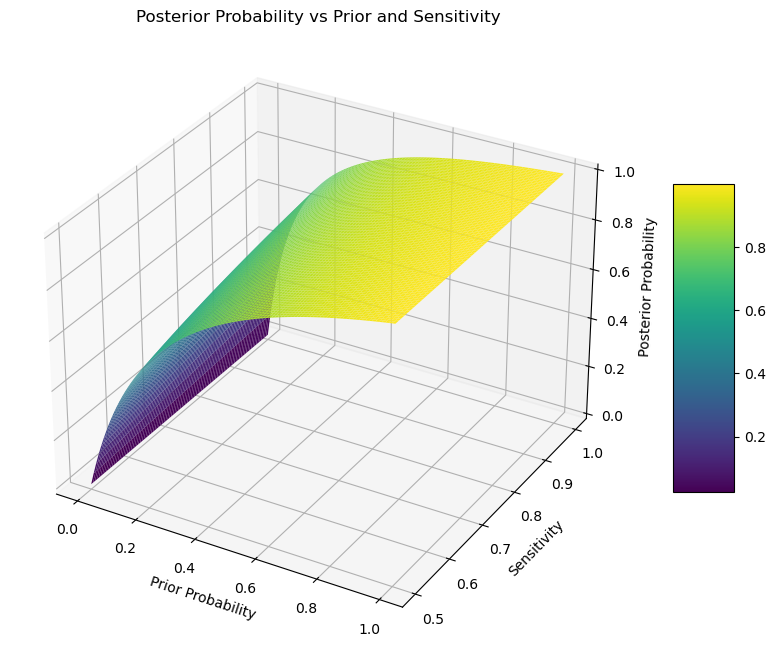

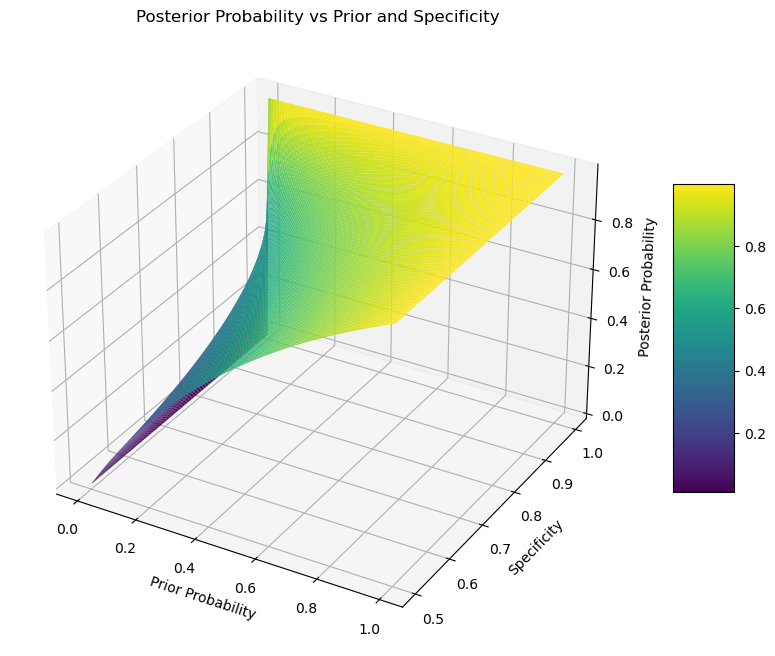

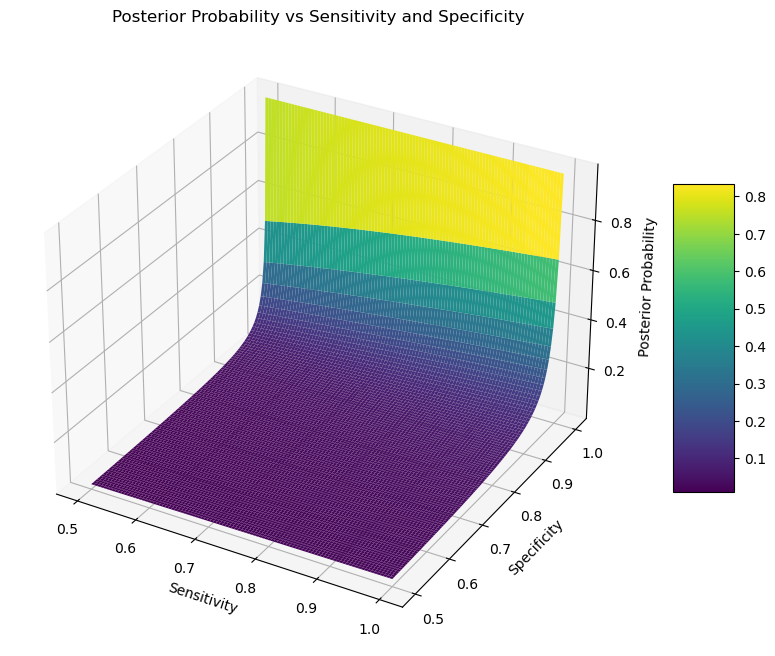

In [10]:
# Bayesian calculation function
def calculate_posterior(prior, sensitivity, specificity, positive_test=True):
    if positive_test:
        # Probability of testing positive given disease P(Positive|Disease)
        prob_positive_given_disease = sensitivity
        # Probability of testing positive given no disease P(Positive|No Disease)
        prob_positive_given_no_disease = 1 - specificity
    else:
        # Probability of testing negative given disease P(Negative|Disease)
        prob_positive_given_disease = 1 - sensitivity
        # Probability of testing negative given no disease P(Negative|No Disease)
        prob_positive_given_no_disease = specificity
    
    # Total probability of testing positive P(Positive)
    prob_positive = (prior * prob_positive_given_disease) + \
                    ((1 - prior) * prob_positive_given_no_disease)
    
    # Posterior probability of having disease given a positive test P(Disease|Positive)
    epsilon = 1e-10  # A small value to prevent division by zero
    posterior = (prior * prob_positive_given_disease) / (prob_positive + epsilon)
    return posterior

# Function to create a 3D surface plot
def plot_3d_surface(X, Y, Z, title, x_label, y_label, z_label):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar
    plt.show()

# Values over which to vary each parameter
priors = np.linspace(0, 1, 100)
sensitivities = np.linspace(0.5, 1, 100)
specificities = np.linspace(0.5, 1, 100)

# Generate grid for priors and sensitivities
priors_grid, sensitivities_grid = np.meshgrid(priors, sensitivities)
posterior_grid_prior_sens = np.zeros(priors_grid.shape)

# Calculate posterior for each combination of prior and sensitivity
for i in range(priors_grid.shape[0]):
    for j in range(priors_grid.shape[1]):
        posterior_grid_prior_sens[i, j] = calculate_posterior(priors_grid[i, j], sensitivities_grid[i, j], specificity)

# Plotting the first 3D surface
plot_3d_surface(priors_grid, sensitivities_grid, posterior_grid_prior_sens,
                'Posterior Probability vs Prior and Sensitivity',
                'Prior Probability', 'Sensitivity', 'Posterior Probability')

# Second Graph
priors_grid, specificities_grid = np.meshgrid(priors, specificities)
posterior_grid_prior_spec = np.zeros(priors_grid.shape)


for i in range(priors_grid.shape[0]):
    for j in range(priors_grid.shape[1]):
        posterior_grid_prior_spec[i, j] = calculate_posterior(priors_grid[i, j], sensitivity, specificities_grid[i, j])


plot_3d_surface(priors_grid, specificities_grid, posterior_grid_prior_spec,
                'Posterior Probability vs Prior and Specificity',
                'Prior Probability', 'Specificity', 'Posterior Probability')

# Third Graph
sensitivities_grid, specificities_grid = np.meshgrid(sensitivities, specificities)
posterior_grid_sens_spec = np.zeros(sensitivities_grid.shape)

for i in range(sensitivities_grid.shape[0]):
    for j in range(sensitivities_grid.shape[1]):
        posterior_grid_sens_spec[i, j] = calculate_posterior(prior_probability, sensitivities_grid[i, j], specificities_grid[i, j])

plot_3d_surface(sensitivities_grid, specificities_grid, posterior_grid_sens_spec,
                'Posterior Probability vs Sensitivity and Specificity',
                'Sensitivity', 'Specificity', 'Posterior Probability')

